Maximum Amplitude of S5 Sequential: 27.0
Maximum Amplitude of S4 Sequential: 27.0
Maximum Amplitude of S5 Uniform Random: 8.0
Maximum Amplitude of S4 Uniform Random: 8.0
Maximum Amplitude of S5 Zipf: 18.0
Maximum Amplitude of S4 Zipf: 18.0
Average Amplitude of S5 Sequential: 4.326116838487972
Average Amplitude of S4 Sequential: 4.356357388316151
Average Amplitude of S5 Uniform Random: 5.706872852233677
Average Amplitude of S4 Uniform Random: 5.7082474226804125
Average Amplitude of S5 Zipf: 10.889070146818923
Average Amplitude of S4 Zipf: 10.889070146818923
Deviation of S5 Sequential: 0.001075
Deviation of S4 Sequential: 0.001081
Deviation of S5 Uniform Random: 0.000212
Deviation of S4 Uniform Random: 0.000212
Deviation of S5 Zipf: 0.000743
Deviation of S4 Zipf: 0.000743


ValueError: x and y must have same first dimension, but have shapes (2910,) and (1226, 1)

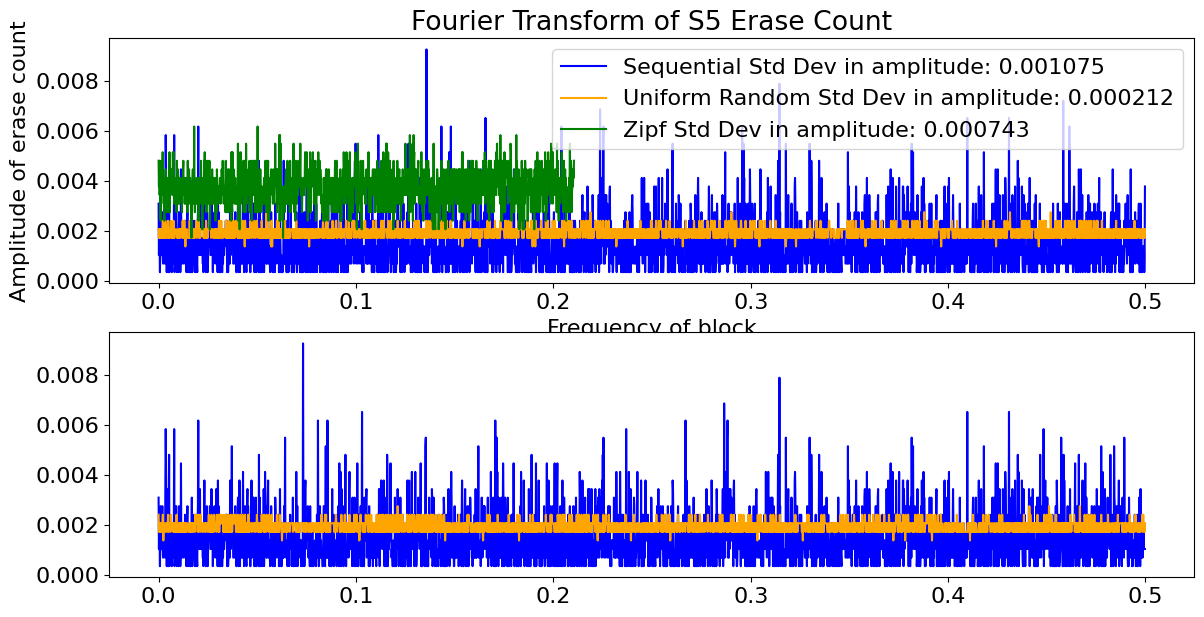

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


# Read JSON files into pandas dataframes
s5_seq_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/seq_s5_op_20/seq_trace.log.json')
s5_uniform_random_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/ran_s5_op_20/rand_trace.log.json')
s5_zipf_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/zipf_s5_op_20/zipf_trace.log.json')

# Extract the erase count data
s5_seq_invalid_page_count = s5_seq_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
s5_uniform_random_invalid_page_count = s5_uniform_random_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
s5_zipf_invalid_page_count = s5_zipf_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')

# remove all 0 values 
s5_seq_invalid_page_count = s5_seq_invalid_page_count[s5_seq_invalid_page_count['invalid_pages'] > 0]
s5_uniform_random_invalid_page_count = s5_uniform_random_invalid_page_count[s5_uniform_random_invalid_page_count['invalid_pages'] > 0]
s5_zipf_invalid_page_count = s5_zipf_invalid_page_count[s5_zipf_invalid_page_count['invalid_pages'] > 0]


# Read JSON files into pandas dataframes
s4_seq_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/seq_s4_op_20/seq_trace.log.json')
s4_uniform_random_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/ran_s4_op_20/rand_trace.log.json')
s4_zipf_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/zipf_s4_op_20/zipf_trace.log.json')

# Extract the erase count data
s4_seq_invalid_page_count = s4_seq_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
s4_uniform_random_invalid_page_count = s4_uniform_random_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
s4_zipf_invalid_page_count = s4_zipf_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')

# remove all 0 values 
s4_seq_invalid_page_count = s4_seq_invalid_page_count[s4_seq_invalid_page_count['invalid_pages'] > 0]
s4_uniform_random_invalid_page_count = s4_uniform_random_invalid_page_count[s4_uniform_random_invalid_page_count['invalid_pages'] > 0]
s4_zipf_invalid_page_count = s4_zipf_invalid_page_count[s4_zipf_invalid_page_count['invalid_pages'] > 0]


# Number of samples
N = len(s4_uniform_random_invalid_page_count)
# Sample spacing (assuming uniform spacing)
T = 1.0

# Compute the FFT for seq, random , zipf both S5 and S4
seq_yf_s5 = fft(s5_seq_invalid_page_count)
seq_yf_s4 = fft(s4_seq_invalid_page_count)
uniform_random_yf_s5 = fft(s5_uniform_random_invalid_page_count)
uniform_random_yf_s4 = fft(s4_uniform_random_invalid_page_count)
zipf_yf_s5 = fft(s5_zipf_invalid_page_count)
zipf_yf_s4 = fft(s4_zipf_invalid_page_count)
xf = fftfreq(N, T)[:N//2]

# find the average amplitude of the fft for S5 and S4 for all traces
average_amplitude_seq_s5 = np.mean(np.abs(seq_yf_s5[:N//2]))
average_amplitude_seq_s4 = np.mean(np.abs(seq_yf_s4[:N//2]))
average_amplitude_uniform_random_s5 = np.mean(np.abs(uniform_random_yf_s5[:N//2]))
average_amplitude_uniform_random_s4 = np.mean(np.abs(uniform_random_yf_s4[:N//2]))
average_amplitude_zipf_s5 = np.mean(np.abs(zipf_yf_s5[:N//2]))
average_amplitude_zipf_s4 = np.mean(np.abs(zipf_yf_s4[:N//2]))


# find the maximum amplitude of the fft for S5 and S4 for all traces
max_amplitude_seq_s5 = np.max(np.abs(seq_yf_s5[:N//2]))
max_amplitude_seq_s4 = np.max(np.abs(seq_yf_s4[:N//2]))
max_amplitude_uniform_random_s5 = np.max(np.abs(uniform_random_yf_s5[:N//2]))
max_amplitude_uniform_random_s4 = np.max(np.abs(uniform_random_yf_s4[:N//2]))
max_amplitude_zipf_s5 = np.max(np.abs(zipf_yf_s5[:N//2]))
max_amplitude_zipf_s4 = np.max(np.abs(zipf_yf_s4[:N//2]))

print(f'Maximum Amplitude of S5 Sequential: {max_amplitude_seq_s5}')
print(f'Maximum Amplitude of S4 Sequential: {max_amplitude_seq_s4}')
print(f'Maximum Amplitude of S5 Uniform Random: {max_amplitude_uniform_random_s5}')
print(f'Maximum Amplitude of S4 Uniform Random: {max_amplitude_uniform_random_s4}')
print(f'Maximum Amplitude of S5 Zipf: {max_amplitude_zipf_s5}')
print(f'Maximum Amplitude of S4 Zipf: {max_amplitude_zipf_s4}')


print(f'Average Amplitude of S5 Sequential: {average_amplitude_seq_s5}')
print(f'Average Amplitude of S4 Sequential: {average_amplitude_seq_s4}')
print(f'Average Amplitude of S5 Uniform Random: {average_amplitude_uniform_random_s5}')
print(f'Average Amplitude of S4 Uniform Random: {average_amplitude_uniform_random_s4}')
print(f'Average Amplitude of S5 Zipf: {average_amplitude_zipf_s5}')
print(f'Average Amplitude of S4 Zipf: {average_amplitude_zipf_s4}')

# Find the deviation of fft for S5 and S4 for all traces two decimal places
deviation_seq_s5 = np.std(2.0/N * np.abs(seq_yf_s5[:N//2])).round(6)
deviation_seq_s4 = np.std(2.0/N * np.abs(seq_yf_s4[:N//2])).round(6)
deviation_uniform_random_s5 = np.std(2.0/N * np.abs(uniform_random_yf_s5[:N//2])).round(6)
deviation_uniform_random_s4 = np.std(2.0/N * np.abs(uniform_random_yf_s4[:N//2])).round(6)
deviation_zipf_s5 = np.std(np.abs(2.0/N * zipf_yf_s5[:N//2])).round(6)
deviation_zipf_s4 = np.std(np.abs(2.0/N * zipf_yf_s4[:N//2])).round(6)

print(f'Deviation of S5 Sequential: {deviation_seq_s5}')
print(f'Deviation of S4 Sequential: {deviation_seq_s4}')
print(f'Deviation of S5 Uniform Random: {deviation_uniform_random_s5}')
print(f'Deviation of S4 Uniform Random: {deviation_uniform_random_s4}')
print(f'Deviation of S5 Zipf: {deviation_zipf_s5}')
print(f'Deviation of S4 Zipf: {deviation_zipf_s4}')


# Plot the FFT results
# increase the text size
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14, 7))

# S5 FFT plot
plt.subplot(2, 1, 1)
plt.plot(xf, 2.0/N * np.abs(seq_yf_s5[:N//2]), label='Sequential Std Dev in amplitude: '+ str(deviation_seq_s5), color='blue')
plt.plot(xf, 2.0/N * np.abs(uniform_random_yf_s5[:N//2]), label='Uniform Random Std Dev in amplitude: '+ str(deviation_uniform_random_s5), color='orange')
# plt.plot(xf, 2.0/N * np.abs(zipf_yf_s5[:N//2]), label='Zipf Std Dev in amplitude: '+ str(deviation_zipf_s5), color='green')
plt.plot(xf[:len(zipf_yf_s5[:N//2])], 2.0/N * np.abs(zipf_yf_s5[:N//2].flatten()), 
         label='Zipf Std Dev in amplitude: '+ str(deviation_zipf_s5), color='green')

plt.title('Fourier Transform of S5 Erase Count')
plt.xlabel('Frequency of block')
plt.ylabel('Amplitude of erase count')
plt.legend()

# S4 FFT plot
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(seq_yf_s4[:N//2]), label='Sequential Std Dev in amplitude: '+ str(deviation_seq_s4), color='blue')
plt.plot(xf, 2.0/N * np.abs(uniform_random_yf_s4[:N//2]), label='Uniform Random Std Dev in amplitude: '+ str(deviation_uniform_random_s4), color='orange')
plt.plot(xf, 2.0/N * np.abs(zipf_yf_s4[:N//2]), label='Zipf Std Dev in amplitude: '+ str(deviation_zipf_s4), color='green')

plt.title('Fourier Transform of S4 Erase Count')
plt.xlabel('Frequency of block')
plt.ylabel('Amplitude of erase count')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
s5_zipf_invalid_page_count = s5_zipf_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
print(s5_zipf_invalid_page_count)
s5_seq_invalid_page_count = s5_seq_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
print(s5_seq_invalid_page_count)
s5_uniform_random_invalid_page_count = s5_uniform_random_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
print(s5_uniform_random_invalid_page_count)

     invalid_pages
0                0
1                0
2                0
3                0
4                0
...            ...
6139             0
6140             0
6141             0
6142            14
6143             0

[6144 rows x 1 columns]
     invalid_pages
0                0
1                0
2                9
3                0
4                3
...            ...
6139             6
6140             0
6141             0
6142             5
6143             0

[6144 rows x 1 columns]
     invalid_pages
0                6
1                0
2                5
3                0
4                5
...            ...
6139             5
6140             6
6141             6
6142             5
6143             0

[6144 rows x 1 columns]


# Real Data analysis

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


# Read JSON files into pandas dataframes
s1_real_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/real_s1_op_20/W2K8.TPCC.10-19-2007.12-51-PM.trace-filtered-target-converted.json')
print(s1_real_trace_df)

               block_0_0_0_0_0_0  block_0_0_0_0_0_1  block_0_0_0_0_0_2   
block_id       block_0_0_0_0_0_0  block_0_0_0_0_0_1  block_0_0_0_0_0_2  \
status                      used               used               used   
offset                        63                 63                 63   
valid_pages                   42                 40                 63   
invalid_pages                 21                 23                  0   
write_count                  820                568                505   
erase_count                   12                  8                  7   
d_time                   4109680            3732184            4400677   

               block_0_0_0_0_0_3  block_0_0_0_0_0_4  block_0_0_0_0_0_5   
block_id       block_0_0_0_0_0_3  block_0_0_0_0_0_4  block_0_0_0_0_0_5  \
status                      used               used               used   
offset                        63                 63                 63   
valid_pages                   44     

In [62]:
s1_real_invalid_page_count = s5_seq_trace_df.iloc[6].reset_index(drop=True).to_frame(name='invalid_pages')
s1_real_valid_page_count = s5_seq_trace_df.iloc[5].reset_index(drop=True).to_frame(name='valid_pages')

In [68]:
# sum the valid and invalid pages
s1_real_invalid_page_count_int = int(s1_real_invalid_page_count.sum())
s1_real_valid_page_count_int = int(s1_real_valid_page_count.sum())
print(s1_real_invalid_page_count_int)
print(s1_real_valid_page_count_int)
#  find the ratio of invalid to valid pages in percentage
ratio = (s1_real_invalid_page_count_int / s1_real_valid_page_count_int) * 100
print(ratio)


# ssd size is 1.27 gb, ratio of invalid pages to ssd size
ssd_size = 1.27 * 1024 * 1024 * 1024
ratio_ssd = (s1_real_valid_page_count_int / ssd_size) * 100
print(ratio_ssd)


18995
3197033
0.5941446334773522
0.23444637832209816


/tmp/ipykernel_65301/1799948892.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s1_real_invalid_page_count_int = int(s1_real_invalid_page_count.sum())
/tmp/ipykernel_65301/1799948892.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s1_real_valid_page_count_int = int(s1_real_valid_page_count.sum())
